In [3]:
# Import libraries
import pandas as pd
from pymongo import MongoClient
from pprint import pprint
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Load the json file
mongo = MongoClient(port=27017)

In [5]:
# Database names for king-bachman database
print(mongo.list_database_names())

['admin', 'config', 'king-bachman', 'local', 'uk_food']


In [6]:
# Assign our database to a variable
db = mongo['king-bachman']

In [7]:
# List the names of the collections in the database
print(db.list_collection_names())

['king-bachman']


In [8]:
# Review a document in the database
pprint(db['king-bachman'].find_one())

{'_id': ObjectId('64b9f6b3a2229c0ebe08e301'),
 'accessInfo': {'accessViewStatus': 'SAMPLE',
                'country': 'US',
                'embeddable': True,
                'epub': {'isAvailable': False},
                'pdf': {'isAvailable': False},
                'publicDomain': False,
                'quoteSharingAllowed': False,
                'textToSpeechPermission': 'ALLOWED_FOR_ACCESSIBILITY',
                'viewability': 'PARTIAL',
                'webReaderLink': 'http://play.google.com/books/reader?id=iCWgDwAAQBAJ&hl=&source=gbs_api'},
 'etag': 'Y6JuzomXmI0',
 'id': 'iCWgDwAAQBAJ',
 'kind': 'books#volume',
 'saleInfo': {'country': 'US', 'isEbook': False, 'saleability': 'NOT_FOR_SALE'},
 'searchInfo': {'textSnippet': 'Readers of Stephen King know that Derry, '
                               'Maine, is a place with a deep, dark hold on '
                               'the author. It reappears in many of his books, '
                               'including Bag of Bo

<Axes: title={'center': 'Number of books published by Stephen King throughout years'}, xlabel='years'>

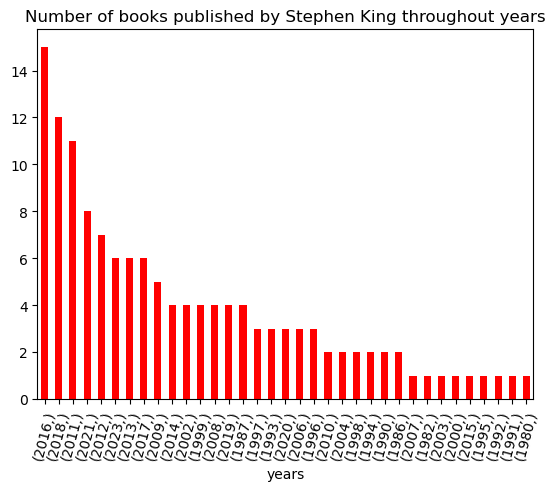

In [58]:
# so we made an empty and named it publish_dates
publish_dates = []
# now we are got itiertae over evey single record in the database
for x in db['king-bachman'].find({}):
    #so we are trying to go through each record that has a published date we then split off (-) the year value
    # if there is no published date it does nothing 
    try:
        if 'Stephen King' in x['volumeInfo']['authors']:
            publish_dates.append(x['volumeInfo']['publishedDate'].split('-')[0])
    except:
        pass



pd.DataFrame({'years': publish_dates}).value_counts().plot(kind='bar', rot=75, color='r', title= "Number of books published by Stephen King throughout years")


<Axes: title={'center': 'Number of books published by Stephen King'}, xlabel='year'>

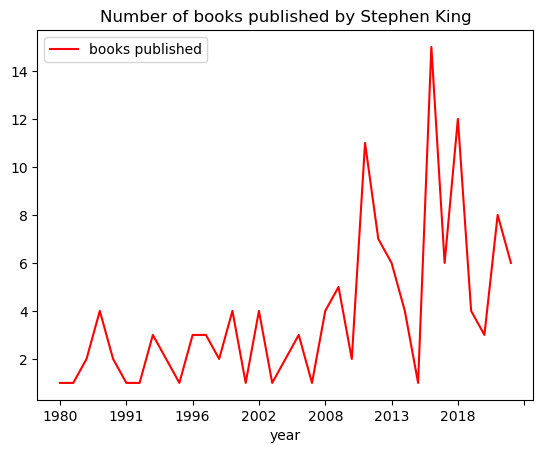

In [60]:


#


pd.DataFrame({x:publish_dates.count(x) for x in publish_dates}.items(), columns=['year', 'books published']).set_index('year').sort_index().plot(kind='line', color='r', title= "Number of books published by Stephen King")

# pd.DataFrame({'years': publish_dates})

In [43]:
king_dates = []
bachman_dates = []
other_dates = []
for x in db['king-bachman'].find({}):
    # made three empty lists so that as we are filtering through book that have authors of Stephen King, Richard Bachman or other 
    #so we are trying to go through each record that has a published date we then split off (-) the year value
    # if there is no published date it does nothing 
    try:
        if 'Stephen King' in x['volumeInfo']['authors']:
            king_dates.append(x['volumeInfo']['publishedDate'].split('-')[0])
        elif 'Richard Bachman' in x['volumeInfo']['authors']:
            bachman_dates.append(x['volumeInfo']['publishedDate'].split('-')[0])
        else:
            other_dates.append(x['volumeInfo']['publishedDate'].split('-')[0])

    except:
        pass
data = {
        'king': king_dates,
        'bachman': bachman_dates,
        'other': other_dates,
    }
data 

pd.DataFrame({x:data for x in data}.items(),columns=['year', 'books published']).set_index('year').sort_index().plot(kind='line', color='r', title= "Number of books published by Stephen King,Richard Bachman and co authors")



{'king': ['2019',
  '2011',
  '1991',
  '2017',
  '2017',
  '2012',
  '2023',
  '2009',
  '2018',
  '2021',
  '2013',
  '2018',
  '2016',
  '2008',
  '2010',
  '2008',
  '2013',
  '1999',
  '2018',
  '2016',
  '2014',
  '2021',
  '2009',
  '2011',
  '2018',
  '2002',
  '2016',
  '2006',
  '1996',
  '2019',
  '2020',
  '1990',
  '2021',
  '2021',
  '2017',
  '1994',
  '2012',
  '2006',
  '1994',
  '2012',
  '1993',
  '1986',
  '2018',
  '2011',
  '2019',
  '2012',
  '2021',
  '2016',
  '2021',
  '2019',
  '2009',
  '2018',
  '2017',
  '2008',
  '2002',
  '2016',
  '2011',
  '2016',
  '2011',
  '2018',
  '2000',
  '2018',
  '2002',
  '1990',
  '2011',
  '2023',
  '1987',
  '2016',
  '2013',
  '2009',
  '2011',
  '2017',
  '2023',
  '1987',
  '2016',
  '2013',
  '2016',
  '2009',
  '2023',
  '2020',
  '2016',
  '2023',
  '2011',
  '2011',
  '2011',
  '1992',
  '2017',
  '1998',
  '2008',
  '2016',
  '2016',
  '2018',
  '2014',
  '2012',
  '2012',
  '2014',
  '1995',
  '2016',
  '1996',
  

In [12]:
#pd.DataFrame({x:publish_dates.count(x) for x in publish_dates}.items(), columns=['year', 'count']).set_index('year').sort_index().plot(kind='line')

